# ARIMA 

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Import ARIMA from statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [2]:
import requests
import pandas as pd

# Your Alpha Vantage API key
api_key = '071XAV96TNY921'

# Define the ticker symbol
tickerSymbol = 'AAPL'  # Microsoft

# Define the API endpoint and parameters
base_url = 'https://www.alphavantage.co/query'
params = {
    'function': 'TIME_SERIES_DAILY',  # Retrieve daily time series
    'symbol': tickerSymbol,
    'apikey': api_key,
    'outputsize': 'full'  # Get the full-length time series
}

# Get the data from Alpha Vantage
response = requests.get(base_url, params=params)
data = response.json()

# Convert the JSON data into a Pandas DataFrame
tickerDf = pd.DataFrame(data['Time Series (Daily)']).T

# Convert index to datetime
tickerDf.index = pd.to_datetime(tickerDf.index)

# Filter data between specific dates
tickerDf = tickerDf[(tickerDf.index >= '2015-1-1') & (tickerDf.index <= '2020-6-10')]

# Print the DataFrame
print(tickerDf)

             1. open   2. high    3. low  4. close 5. volume
2020-06-10  347.9000  354.7700  346.0900  352.8400  41662938
2020-06-09  332.1400  345.6100  332.0100  343.9900  36928091
2020-06-08  330.2500  333.6000  327.3200  333.4600  23913634
2020-06-05  323.3500  331.7500  323.2300  331.5000  34312550
2020-06-04  324.3900  325.6200  320.7800  322.3200  21890091
...              ...       ...       ...       ...       ...
2015-01-08  109.2300  112.1500  108.7000  111.8900  59364547
2015-01-07  107.2000  108.2000  106.6950  107.7500  40105934
2015-01-06  106.5400  107.4300  104.6300  106.2600  65797116
2015-01-05  108.2900  108.6500  105.4100  106.2500  64285491
2015-01-02  111.3900  111.4400  107.3500  109.3300  53204626

[1369 rows x 5 columns]


In [3]:
print(tickerDf.columns)

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


In [4]:
print(tickerDf['4. close'].head())


2020-06-10    352.8400
2020-06-09    343.9900
2020-06-08    333.4600
2020-06-05    331.5000
2020-06-04    322.3200
Name: 4. close, dtype: object


In [5]:
tickerDf['4. close'] = pd.to_numeric(tickerDf['4. close'], errors='coerce')
returns = 100 * tickerDf['4. close'].pct_change().dropna()
returns.index.name = 'date'
returns.name = 'data'

In [6]:
returns

date
2020-06-09   -2.508219
2020-06-08   -3.061135
2020-06-05   -0.587777
2020-06-04   -2.769231
2020-06-03    0.868702
                ...   
2015-01-08   -0.107133
2015-01-07   -3.700063
2015-01-06   -1.382831
2015-01-05   -0.009411
2015-01-02    2.898824
Name: data, Length: 1368, dtype: float64

In [7]:
print(returns.index)  # Check if the index contains valid date values


DatetimeIndex(['2020-06-09', '2020-06-08', '2020-06-05', '2020-06-04',
               '2020-06-03', '2020-06-02', '2020-06-01', '2020-05-29',
               '2020-05-28', '2020-05-27',
               ...
               '2015-01-15', '2015-01-14', '2015-01-13', '2015-01-12',
               '2015-01-09', '2015-01-08', '2015-01-07', '2015-01-06',
               '2015-01-05', '2015-01-02'],
              dtype='datetime64[ns]', name='date', length=1368, freq=None)


In [8]:
# Ensure the index is in datetime format
returns.index = pd.to_datetime(returns.index)

# Sort the DataFrame by its index (dates)
returns = returns.sort_index()

# Check if it's sorted correctly
print("Sorted index:\n", returns.index)
# Check if data exists between 2020-01-01 and 2020-06-10 after sorting
print(returns['2020-01-01':'2020-06-10'])


Sorted index:
 DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-05-27', '2020-05-28', '2020-05-29', '2020-06-01',
               '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-08', '2020-06-09'],
              dtype='datetime64[ns]', name='date', length=1368, freq=None)
date
2020-01-02    0.981744
2020-01-03   -0.790527
2020-01-06    0.472536
2020-01-07   -1.583166
2020-01-08   -2.079902
                ...   
2020-06-03    0.868702
2020-06-04   -2.769231
2020-06-05   -0.587777
2020-06-08   -3.061135
2020-06-09   -2.508219
Name: data, Length: 110, dtype: float64


Text(0.5, 1.0, 'AAPL Returns')

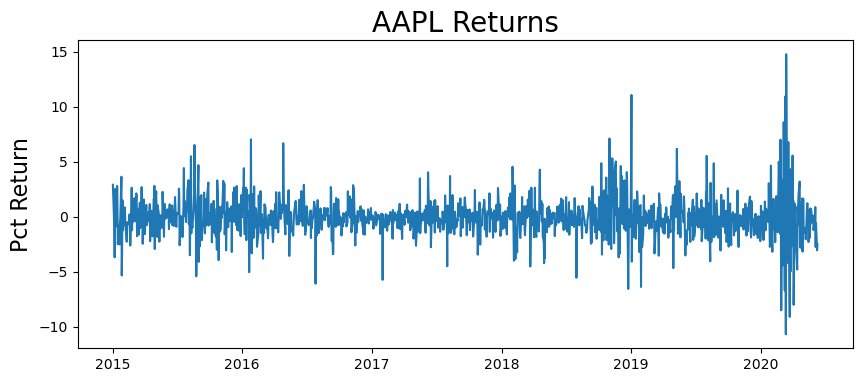

In [9]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('AAPL Returns', fontsize=20)

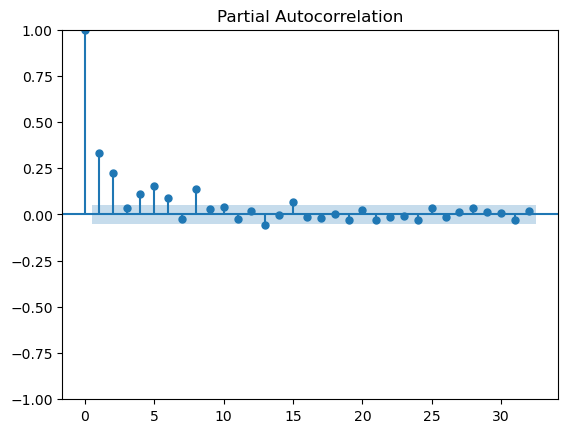

In [10]:
plot_pacf(returns**2)
plt.show()

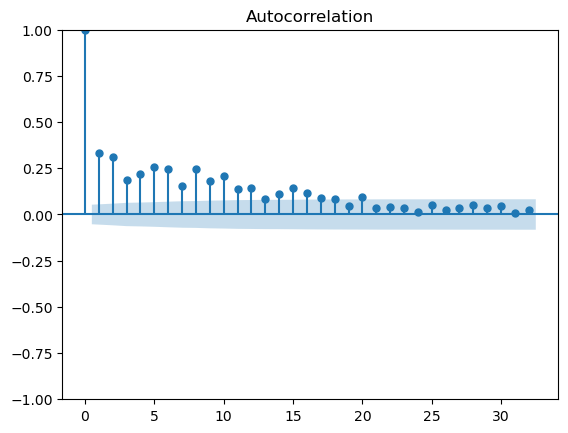

In [11]:
plot_acf(returns**2)
plt.show()

In [12]:
# Define the training and test date ranges
train_end = datetime(2019, 12, 31)
test_end = datetime(2020, 6, 10)

# Redefine train_data and test_data after sorting the index
train_data = returns[:train_end]  # Train data up to 2019-12-31
test_data = returns[train_end + timedelta(days=1):test_end]  # Test data from 2020-01-01 to 2020-06-10
# Set frequency for the time series
train_data = train_data.asfreq('B')  # 'B' for business day frequency
test_data = test_data.asfreq('B')

# Check the results
print("Train Data:\n", train_data.tail())
print("Test Data:\n", test_data.head())


Train Data:
 date
2019-12-25         NaN
2019-12-26    0.037957
2019-12-27   -0.590011
2019-12-30   -0.725353
2019-12-31   -2.230731
Freq: B, Name: data, dtype: float64
Test Data:
 date
2020-01-02    0.981744
2020-01-03   -0.790527
2020-01-06    0.472536
2020-01-07   -1.583166
2020-01-08   -2.079902
Freq: B, Name: data, dtype: float64


In [13]:
train_data

date
2015-01-02    2.898824
2015-01-05   -0.009411
2015-01-06   -1.382831
2015-01-07   -3.700063
2015-01-08   -0.107133
                ...   
2019-12-25         NaN
2019-12-26    0.037957
2019-12-27   -0.590011
2019-12-30   -0.725353
2019-12-31   -2.230731
Freq: B, Name: data, Length: 1303, dtype: float64

In [14]:
test_data

date
2020-01-02    0.981744
2020-01-03   -0.790527
2020-01-06    0.472536
2020-01-07   -1.583166
2020-01-08   -2.079902
                ...   
2020-06-03    0.868702
2020-06-04   -2.769231
2020-06-05   -0.587777
2020-06-08   -3.061135
2020-06-09   -2.508219
Freq: B, Name: data, Length: 114, dtype: float64

In [15]:
model = ARIMA(train_data, order=(8, 1, 10))  # Example ARIMA(2,0,3)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

C:\Users\ASHU\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ASHU\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ASHU\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                 1303
Model:                ARIMA(8, 1, 10)   Log Likelihood               -2347.465
Date:                Mon, 16 Sep 2024   AIC                           4732.931
Time:                        03:29:11   BIC                           4831.192
Sample:                    01-02-2015   HQIC                          4769.796
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4088      0.225     -6.251      0.000      -1.851      -0.967
ar.L2         -1.4099      0.480     -2.936      0.003      -2.351      -0.469
ar.L3         -1.8654      0.596     -3.130      0.0

In [16]:
#get prediction and residuals
predictions=model_fit.forecast(len(test_data))
predictions=pd.Series(predictions,index=test_data.index).dropna()
residuals=(test_data-predictions).dropna()

In [17]:
print(test_data.head())

date
2020-01-02    0.981744
2020-01-03   -0.790527
2020-01-06    0.472536
2020-01-07   -1.583166
2020-01-08   -2.079902
Freq: B, Name: data, dtype: float64


In [18]:
predictions

date
2020-01-02   -0.060687
2020-01-03    0.127487
2020-01-06   -0.072561
2020-01-07    0.018260
2020-01-08   -0.218473
                ...   
2020-06-02   -0.104309
2020-06-03   -0.036129
2020-06-04   -0.114124
2020-06-05   -0.024193
2020-06-08   -0.122138
Freq: B, Name: predicted_mean, Length: 113, dtype: float64

In [19]:
residuals

date
2020-01-02    1.042431
2020-01-03   -0.918014
2020-01-06    0.545097
2020-01-07   -1.601425
2020-01-08   -1.861429
                ...   
2020-06-02   -0.443181
2020-06-03    0.904831
2020-06-04   -2.655107
2020-06-05   -0.563584
2020-06-08   -2.938997
Length: 109, dtype: float64

Text(0, 0.5, 'Error')

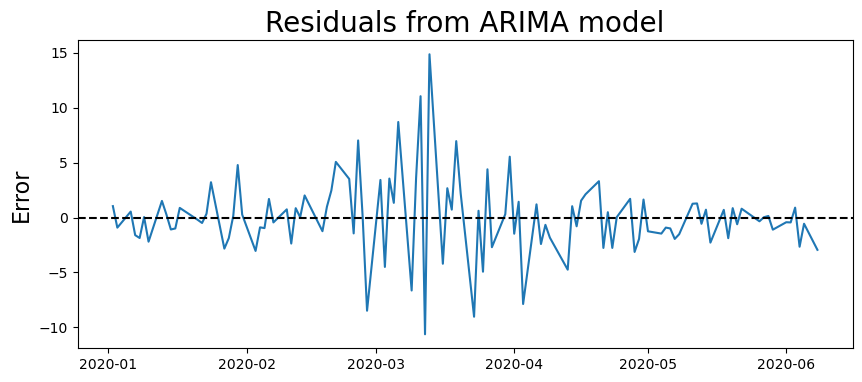

In [20]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0,linestyle='--',color='k')
plt.title("Residuals from ARIMA model", fontsize=20)
plt.ylabel('Error',fontsize=16)

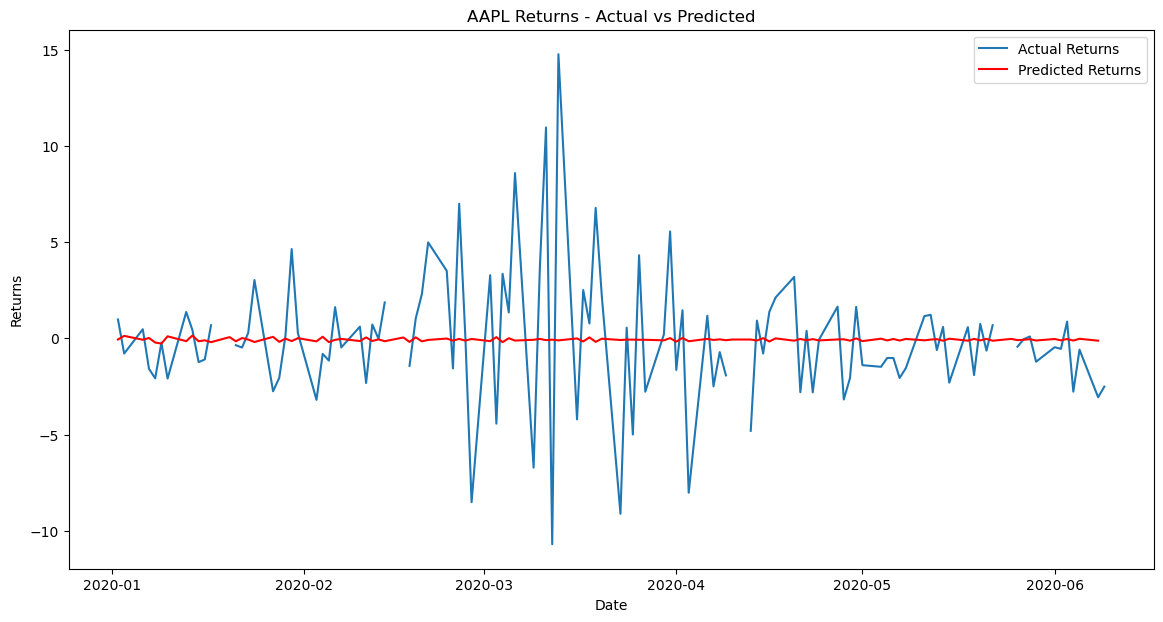

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(test_data, label='Actual Returns')
plt.plot(predictions, label='Predicted Returns', color='red')
plt.title(f'{tickerSymbol} Returns - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("Data is non-stationary. Consider differencing.")

ADF Statistic: -10.487220763430756
p-value: 1.1718718019365224e-18


Text(0, 0.5, 'Production')

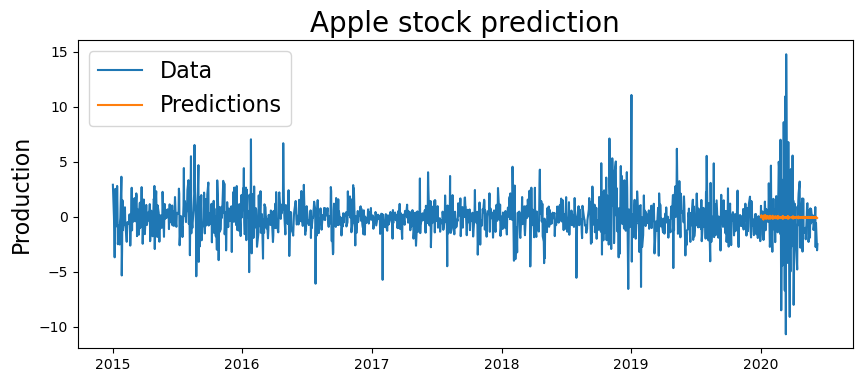

In [23]:
plt.figure(figsize=(10,4))

plt.plot(returns)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Apple stock prediction', fontsize=20)
plt.ylabel('Production', fontsize=16)

In [24]:
print('Mean absolute percent error:', round(np.mean(abs(residuals/test_data)),4))

Mean absolute percent error: 1.02


In [25]:
print('Root mean sqaure Error', np.sqrt(np.mean(residuals**2)))

Root mean sqaure Error 3.500902460462597


# LSTM

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
# Assuming returns DataFrame is already prepared
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(returns.values.reshape(-1, 1))

In [28]:
scaled_data 

array([[0.53402177],
       [0.41980784],
       [0.36587007],
       ...,
       [0.39709391],
       [0.29995867],
       [0.32167314]])

In [29]:
# Define the sequence generator
sequence_length = 60  # Number of time steps for each input sequence
generator = TimeseriesGenerator(scaled_data, scaled_data, length=sequence_length, batch_size=1)


In [30]:
generator

In [31]:
# Split data into training and testing
split = int(len(scaled_data) * 0.8)
train_data = scaled_data[:split]
test_data = scaled_data[split:]

In [47]:
test_data

array([[0.49068408],
       [0.66251214],
       [0.35897661],
       [0.3736888 ],
       [0.43753274],
       [0.44261891],
       [0.54694627],
       [0.34630452],
       [0.50225497],
       [0.48837876],
       [0.43531856],
       [0.43648317],
       [0.43899675],
       [0.39991338],
       [0.49263445],
       [0.46028851],
       [0.28157339],
       [0.35778532],
       [0.3633528 ],
       [0.31835574],
       [0.37062274],
       [0.37522188],
       [0.43271618],
       [0.42098654],
       [0.44890751],
       [0.39688407],
       [0.32993653],
       [0.43168908],
       [0.38887118],
       [0.43361206],
       [0.42413277],
       [0.48062153],
       [0.33703273],
       [0.42135714],
       [0.45629108],
       [0.34944582],
       [0.39731861],
       [0.38790015],
       [0.42363875],
       [0.50283799],
       [0.39636875],
       [0.38172224],
       [0.44898707],
       [0.39023521],
       [0.3836243 ],
       [0.43381241],
       [0.44238716],
       [0.376

In [32]:
# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Fit the model
model.fit(generator, epochs=50, verbose=1)

Epoch 1/50
1308/1308 [==============================] - 35s 25ms/step - loss: 0.0068
Epoch 2/50
1308/1308 [==============================] - 32s 24ms/step - loss: 0.0057
Epoch 3/50
1308/1308 [==============================] - 32s 25ms/step - loss: 0.0054
Epoch 4/50
1308/1308 [==============================] - 32s 24ms/step - loss: 0.0054
Epoch 5/50
1308/1308 [==============================] - 32s 25ms/step - loss: 0.0054
Epoch 6/50
1308/1308 [==============================] - 34s 26ms/step - loss: 0.0053
Epoch 7/50
1308/1308 [==============================] - 32s 24ms/step - loss: 0.0053
Epoch 8/50
1308/1308 [==============================] - 33s 25ms/step - loss: 0.0052
Epoch 9/50
1308/1308 [==============================] - 33s 25ms/step - loss: 0.0053
Epoch 10/50
1308/1308 [==============================] - 33s 25ms/step - loss: 0.0051
Epoch 11/50
1308/1308 [==============================] - 33s 25ms/step - loss: 0.0052
Epoch 12/50
1308/1308 [==============================] - 33s 25

In [34]:
# Prepare data for prediction
def predict_lstm(model, data, sequence_length):
    predictions = []
    for i in range(len(data) - sequence_length):
        x_input = data[i:i + sequence_length]
        x_input = x_input.reshape((1, sequence_length, 1))
        yhat = model.predict(x_input, verbose=0)
        predictions.append(yhat[0,0])
    return predictions

In [35]:
# Predict and invert scaling
predictions = predict_lstm(model, scaled_data, sequence_length)
predictions = np.array(predictions)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

In [46]:
predictions

array([[-0.35575777],
       [-0.278481  ],
       [-0.27807805],
       ...,
       [-0.2333927 ],
       [-0.32035553],
       [-0.24881195]], dtype=float32)

In [36]:
# Create DataFrame for plotting
predicted_dates = returns.index[sequence_length:]
predicted_df = pd.Series(predictions.flatten(), index=predicted_dates, name='Predicted Returns')


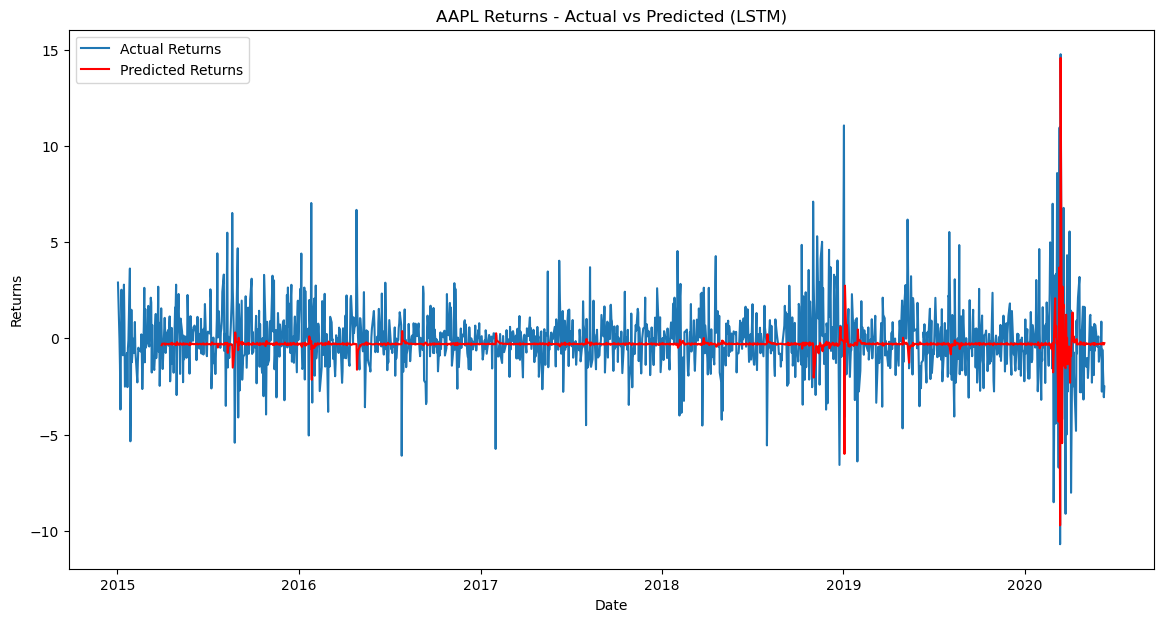

In [37]:
# Plot results
plt.figure(figsize=(14, 7))
plt.plot(returns, label='Actual Returns')
plt.plot(predicted_df, label='Predicted Returns', color='red')
plt.title(f'{tickerSymbol} Returns - Actual vs Predicted (LSTM)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
actual_returns = returns.values[sequence_length:]
mae = mean_absolute_error(actual_returns, predictions.flatten())
mse = mean_squared_error(actual_returns, predictions.flatten())
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 1.1820389285368775
Mean Squared Error: 2.9752540385386643
Root Mean Squared Error: 1.7248924715873348
